In [1]:
import pandas as pd

# Load the CSV file
file_path = 'ONS_smoking_habits_in_the_uk_and_its_constituent_countries/Table_1.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand its structure
print(data.head())

       Sex Country code  Country Age group  2022 \nCurrent smokers \n%  \
0  Persons    E92000001  England     18-24                        11.6   
1  Persons    E92000001  England     25-34                        16.3   
2  Persons    E92000001  England     35-44                        14.4   
3  Persons    E92000001  England     45-54                        13.9   
4  Persons    E92000001  England     55-64                        13.2   

   2022 \nCurrent smokers \nLCL  2022 \nCurrent smokers \nUCL  \
0                          10.5                          12.7   
1                          15.4                          17.2   
2                          13.6                          15.2   
3                          13.2                          14.6   
4                          12.5                          13.9   

   2022 \nEx-smokers \n%  2022 \nEx-smokers \nLCL  2022 \nEx-smokers \nUCL  \
0                    5.8                      5.1                      6.5   
1       

In [2]:
# Clean the column names
data.columns = data.columns.str.replace('\n', '').str.replace(' ', '_').str.replace('__', '_').str.strip()
print(data.columns.tolist())

['Sex', 'Country_code', 'Country', 'Age_group', '2022_Current_smokers_%', '2022_Current_smokers_LCL', '2022_Current_smokers_UCL', '2022_Ex-smokers_%', '2022_Ex-smokers_LCL', '2022_Ex-smokers_UCL', '2022_Never_smoked_%', '2022_Never_smoked_LCL', '2022_Never_smoked_UCL', '2022_Weighted_count_[note_2]', '2022_Sample_size_[note_3]', '2021_Current_smokers_%', '2021_Current_smokers_LCL', '2021_Current_smokers_UCL', '2021_Ex-smokers_%', '2021_Ex-smokers_LCL', '2021_Ex-smokers_UCL', '2021_Never_smoked_%', '2021_Never_smoked_LCL', '2021_Never_smoked_UCL', '2021_Weighted_count_[note_2]', '2021_Sample_size_[note_3]', '2020_Current_smokers_%', '2020_Current_smokers_LCL', '2020_Current_smokers_UCL', '2020_Ex-smokers_%', '2020_Ex-smokers_LCL', '2020_Ex-smokers_UCL', '2020_Never_smoked_%', '2020_Never_smoked_LCL', '2020_Never_smoked_UCL', '2020_Weighted_count_[note_2]', '2020_Sample_size_[note_3]', '2019_Current_smokers_%', '2019_Current_smokers_LCL', '2019_Current_smokers_UCL', '2019_Ex-smokers_%', 

In [3]:
# Adjusted column names based on the inspection
columns_of_interest = [
    'Country', 'Sex', 'Age_group',
    '2022_Current_smokers_%', '2022_Current_smokers_LCL', '2022_Current_smokers_UCL',
    '2022_Ex-smokers_%', '2022_Ex-smokers_LCL', '2022_Ex-smokers_UCL',
    '2022_Never_smoked_%', '2022_Never_smoked_LCL', '2022_Never_smoked_UCL'
]

# Select relevant columns for the year 2022
data_2022 = data[columns_of_interest].copy()
print(data_2022.head())

   Country      Sex Age_group  2022_Current_smokers_%  \
0  England  Persons     18-24                    11.6   
1  England  Persons     25-34                    16.3   
2  England  Persons     35-44                    14.4   
3  England  Persons     45-54                    13.9   
4  England  Persons     55-64                    13.2   

   2022_Current_smokers_LCL  2022_Current_smokers_UCL  2022_Ex-smokers_%  \
0                      10.5                      12.7                5.8   
1                      15.4                      17.2               15.5   
2                      13.6                      15.2               22.4   
3                      13.2                      14.6               27.3   
4                      12.5                      13.9               28.6   

   2022_Ex-smokers_LCL  2022_Ex-smokers_UCL  2022_Never_smoked_%  \
0                  5.1                  6.5                 82.5   
1                 14.7                 16.3                 68.2

In [4]:
# Convert percentage columns to numeric
percentage_columns = [
    '2022_Current_smokers_%', '2022_Current_smokers_LCL', '2022_Current_smokers_UCL',
    '2022_Ex-smokers_%', '2022_Ex-smokers_LCL', '2022_Ex-smokers_UCL',
    '2022_Never_smoked_%', '2022_Never_smoked_LCL', '2022_Never_smoked_UCL'
]

for col in percentage_columns:
    data_2022[col] = pd.to_numeric(data_2022[col], errors='coerce')

# Check for missing data
missing_data_summary = data_2022.isnull().sum()
print(missing_data_summary)

Country                     0
Sex                         0
Age_group                   0
2022_Current_smokers_%      0
2022_Current_smokers_LCL    0
2022_Current_smokers_UCL    0
2022_Ex-smokers_%           0
2022_Ex-smokers_LCL         0
2022_Ex-smokers_UCL         0
2022_Never_smoked_%         0
2022_Never_smoked_LCL       0
2022_Never_smoked_UCL       0
dtype: int64


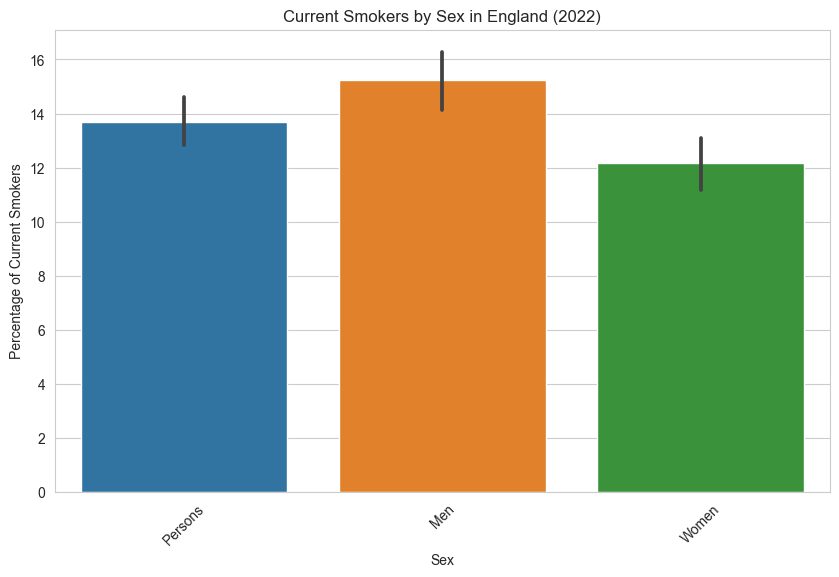

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar plot for current smokers by Sex
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='2022_Current_smokers_%', data=data_2022)
plt.xticks(rotation=45)
plt.title('Current Smokers by Sex in England (2022)')
plt.ylabel('Percentage of Current Smokers')
plt.xlabel('Sex')
plt.show()

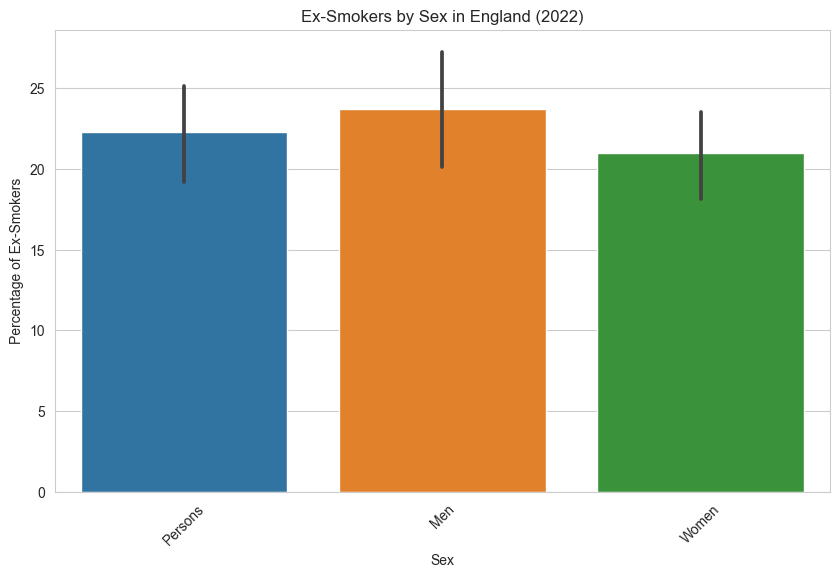

In [6]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar plot for Ex-smokers by Sex
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='2022_Ex-smokers_%', data=data_2022)
plt.xticks(rotation=45)
plt.title('Ex-Smokers by Sex in England (2022)')
plt.ylabel('Percentage of Ex-Smokers')
plt.xlabel('Sex')
plt.show()

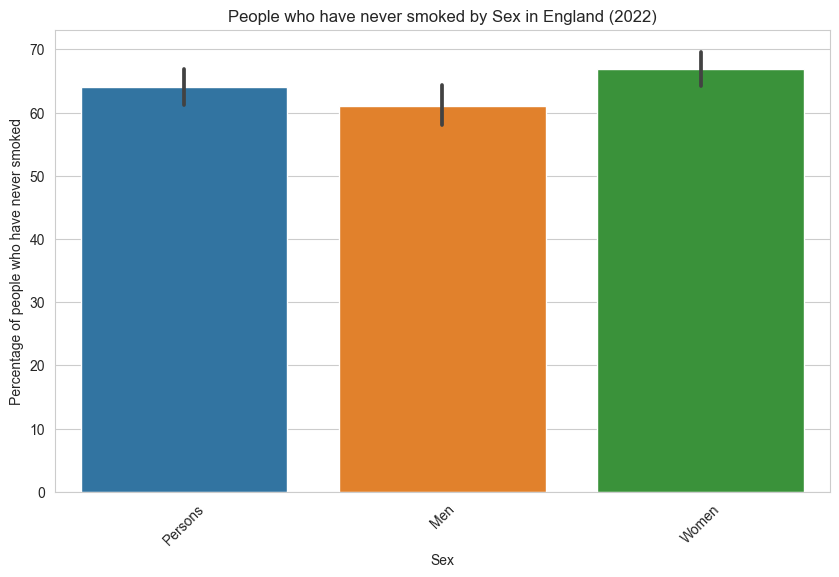

In [7]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar plot for people who have Never smoked by Sex
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='2022_Never_smoked_%', data=data_2022)
plt.xticks(rotation=45)
plt.title('People who have never smoked by Sex in England (2022)')
plt.ylabel('Percentage of people who have never smoked')
plt.xlabel('Sex')
plt.show()

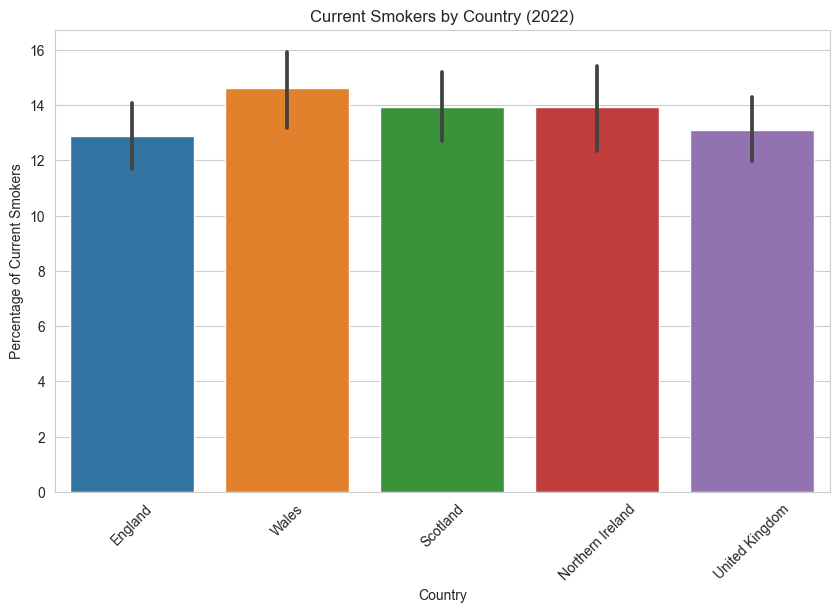

In [9]:
# Create a bar plot for current smokers by Country
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='2022_Current_smokers_%', data=data_2022)
plt.xticks(rotation=45)
plt.title('Current Smokers by Country (2022)')
plt.ylabel('Percentage of Current Smokers')
plt.xlabel('Country')
plt.show()

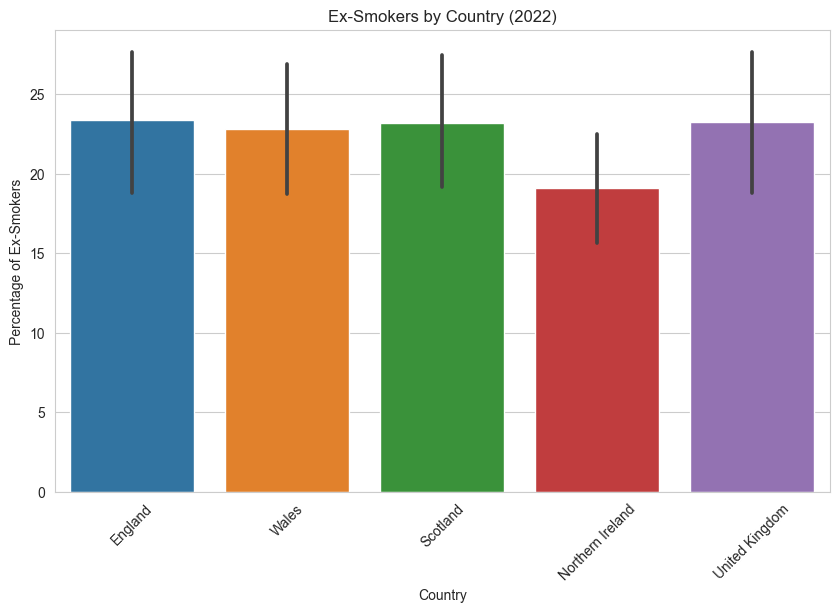

In [10]:
# Create a bar plot for Ex-smokers by Country
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='2022_Ex-smokers_%', data=data_2022)
plt.xticks(rotation=45)
plt.title('Ex-Smokers by Country (2022)')
plt.ylabel('Percentage of Ex-Smokers')
plt.xlabel('Country')
plt.show()

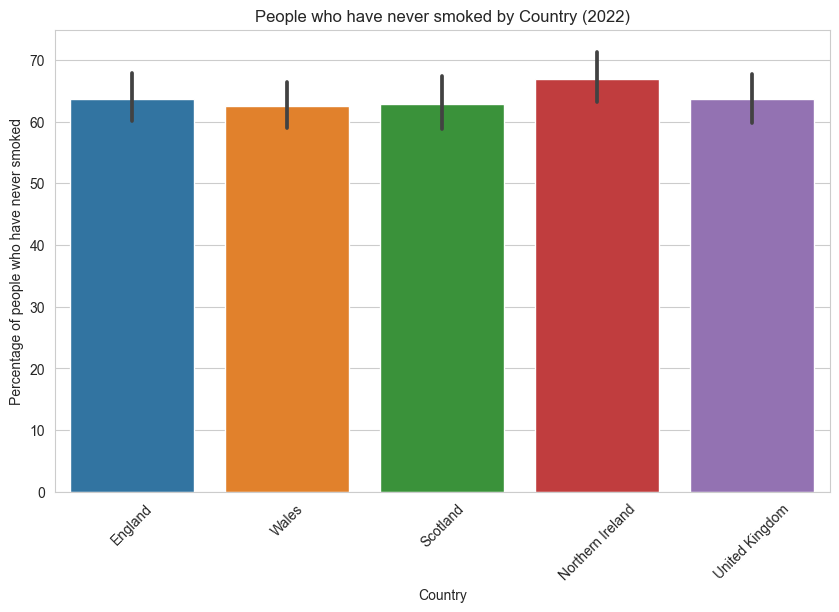

In [12]:
# Create a bar plot for people who have never smoked by Country
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='2022_Never_smoked_%', data=data_2022)
plt.xticks(rotation=45)
plt.title('People who have never smoked by Country (2022)')
plt.ylabel('Percentage of people who have never smoked')
plt.xlabel('Country')
plt.show()

In [14]:
# Display the cleaned column names
print(data.columns.tolist())

# Extract the years present in the dataset based on column names
years = list(set([col.split('_')[0] for col in data.columns if col.split('_')[0].isdigit()]))
print("Years found in the dataset:", years)

# List of smoking status categories
smoking_statuses = ['Current_smokers_%', 'Ex-smokers_%', 'Never_smoked_%']

# Correct column names for melting
columns_to_melt = {}
for status in smoking_statuses:
    columns_to_melt[status] = [col for col in data.columns if status in col]

print("Columns to melt for each status:", columns_to_melt)

# Initialize an empty list to store dataframes
dfs = []

# Loop through each smoking status to melt the data
for status, status_cols in columns_to_melt.items():
    status_df = data.melt(id_vars=['Country', 'Sex'],
                          value_vars=status_cols,
                          var_name='Year_Status',
                          value_name=status)
    
    # Extract year from the combined Year_Status column
    status_df['Year'] = status_df['Year_Status'].str.extract('(\d{4})').astype(int)
    
    # Drop the Year_Status column
    status_df = status_df.drop(columns=['Year_Status'])
    
    # Append the melted dataframe to the list
    dfs.append(status_df)

# Merge the dataframes on common columns
data_long = dfs[0]
for df in dfs[1:]:
    data_long = pd.merge(data_long, df, on=['Country', 'Sex', 'Year'])

print(data_long.head())

['Sex', 'Country_code', 'Country', 'Age_group', '2022_Current_smokers_%', '2022_Current_smokers_LCL', '2022_Current_smokers_UCL', '2022_Ex-smokers_%', '2022_Ex-smokers_LCL', '2022_Ex-smokers_UCL', '2022_Never_smoked_%', '2022_Never_smoked_LCL', '2022_Never_smoked_UCL', '2022_Weighted_count_[note_2]', '2022_Sample_size_[note_3]', '2021_Current_smokers_%', '2021_Current_smokers_LCL', '2021_Current_smokers_UCL', '2021_Ex-smokers_%', '2021_Ex-smokers_LCL', '2021_Ex-smokers_UCL', '2021_Never_smoked_%', '2021_Never_smoked_LCL', '2021_Never_smoked_UCL', '2021_Weighted_count_[note_2]', '2021_Sample_size_[note_3]', '2020_Current_smokers_%', '2020_Current_smokers_LCL', '2020_Current_smokers_UCL', '2020_Ex-smokers_%', '2020_Ex-smokers_LCL', '2020_Ex-smokers_UCL', '2020_Never_smoked_%', '2020_Never_smoked_LCL', '2020_Never_smoked_UCL', '2020_Weighted_count_[note_2]', '2020_Sample_size_[note_3]', '2019_Current_smokers_%', '2019_Current_smokers_LCL', '2019_Current_smokers_UCL', '2019_Ex-smokers_%', 

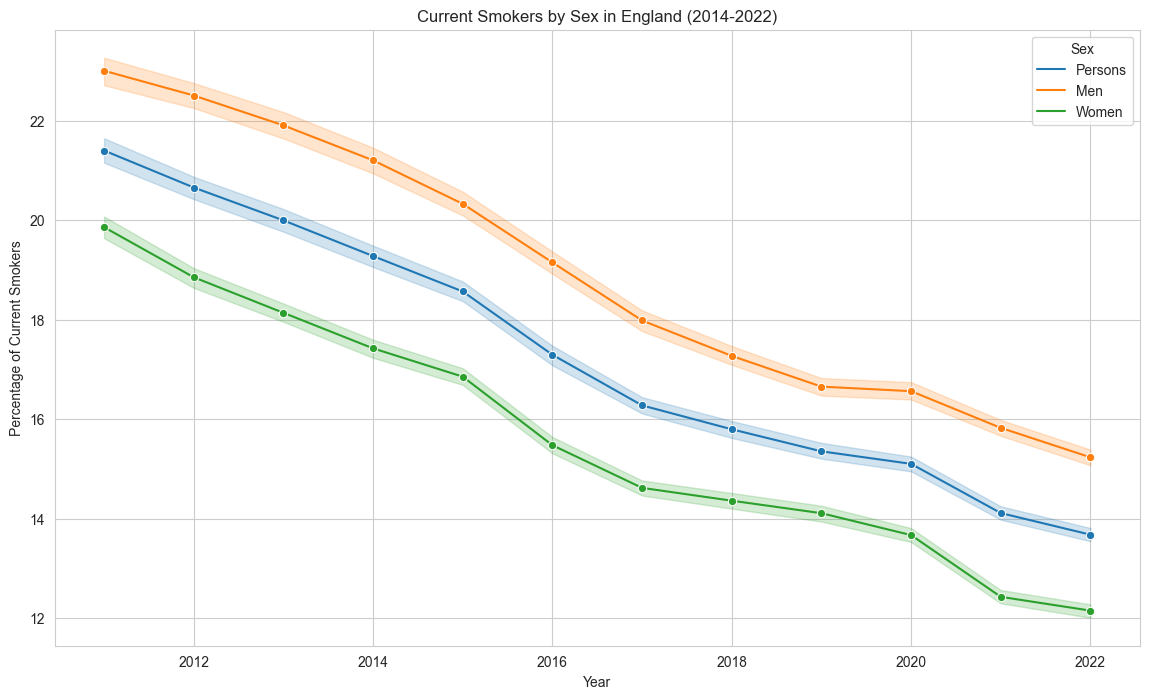

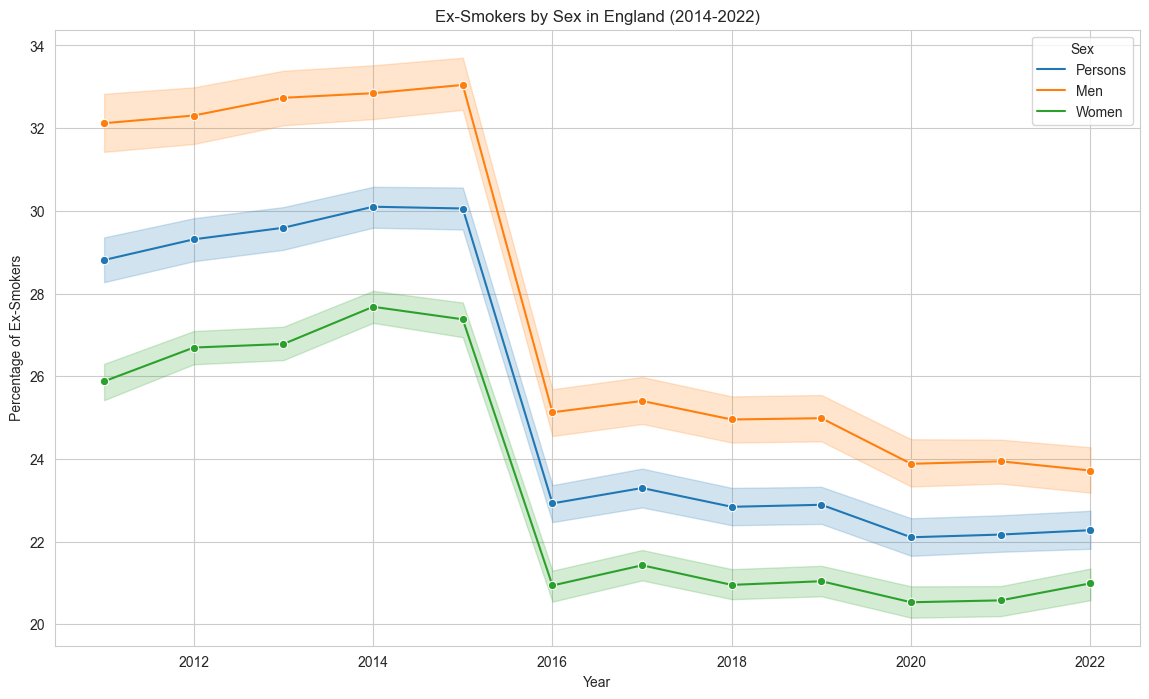

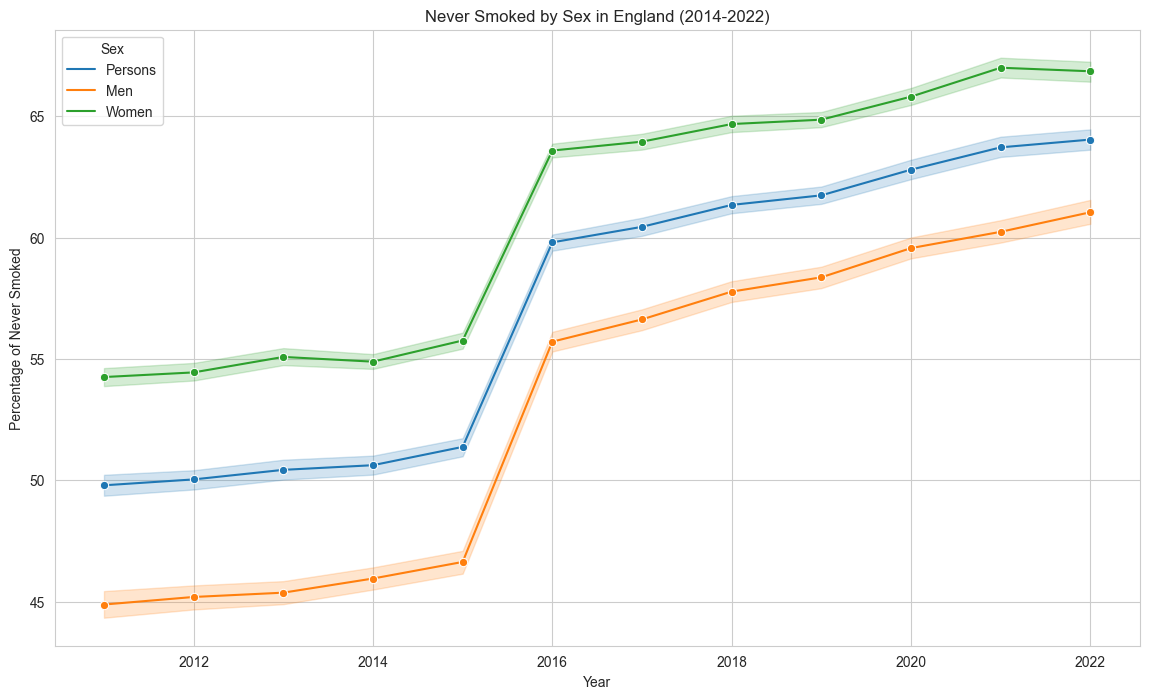

In [15]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create line plots for each smoking category by Sex
smoking_categories = ['Current_smokers_%', 'Ex-smokers_%', 'Never_smoked_%']
titles = ['Current Smokers', 'Ex-Smokers', 'Never Smoked']

for category, title in zip(smoking_categories, titles):
    plt.figure(figsize=(14, 8))
    sns.lineplot(x='Year', y=category, hue='Sex', data=data_long, marker='o')
    plt.title(f'{title} by Sex in England (2014-2022)')
    plt.ylabel(f'Percentage of {title}')
    plt.xlabel('Year')
    plt.legend(title='Sex')
    plt.show()

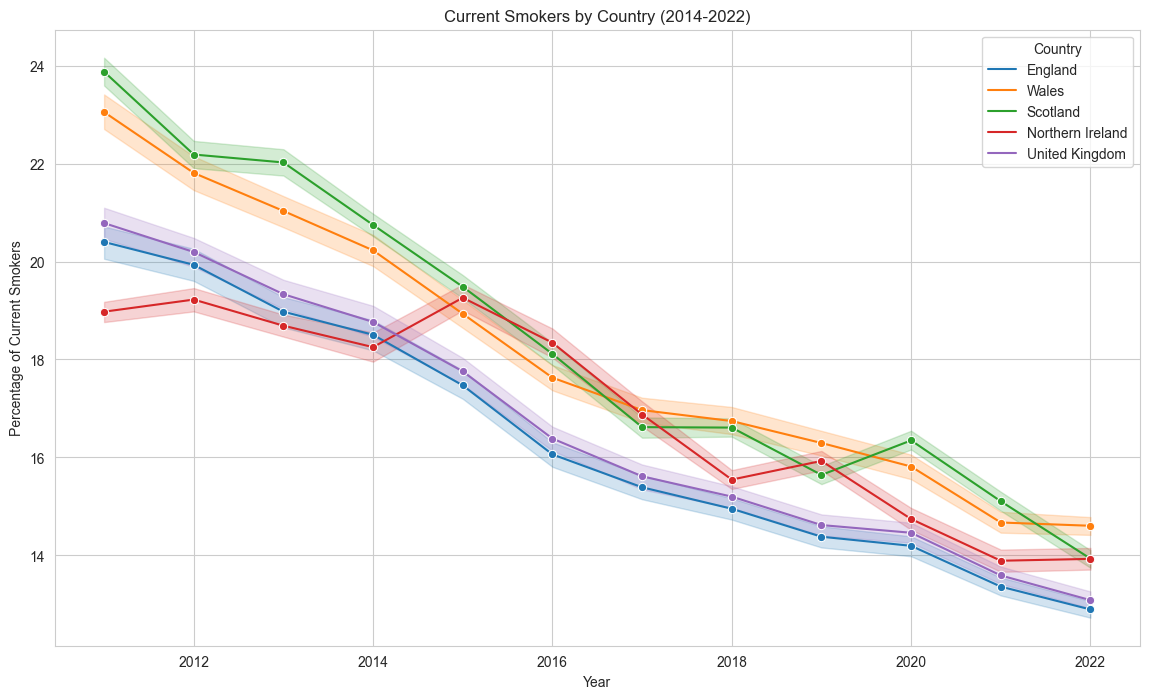

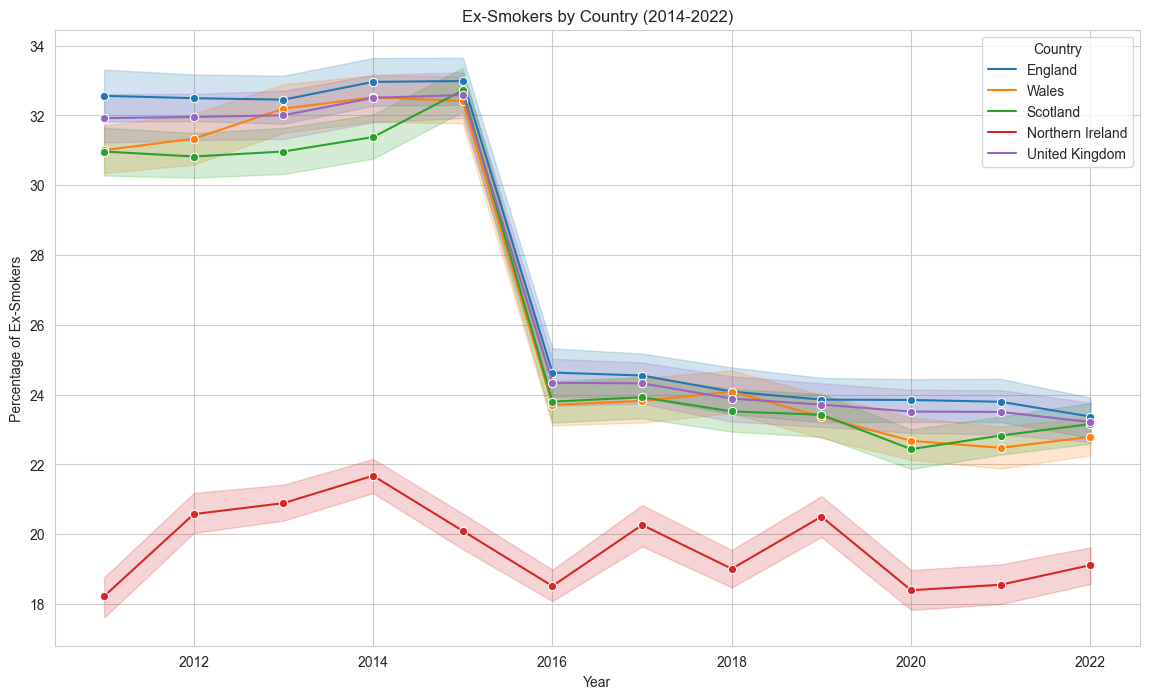

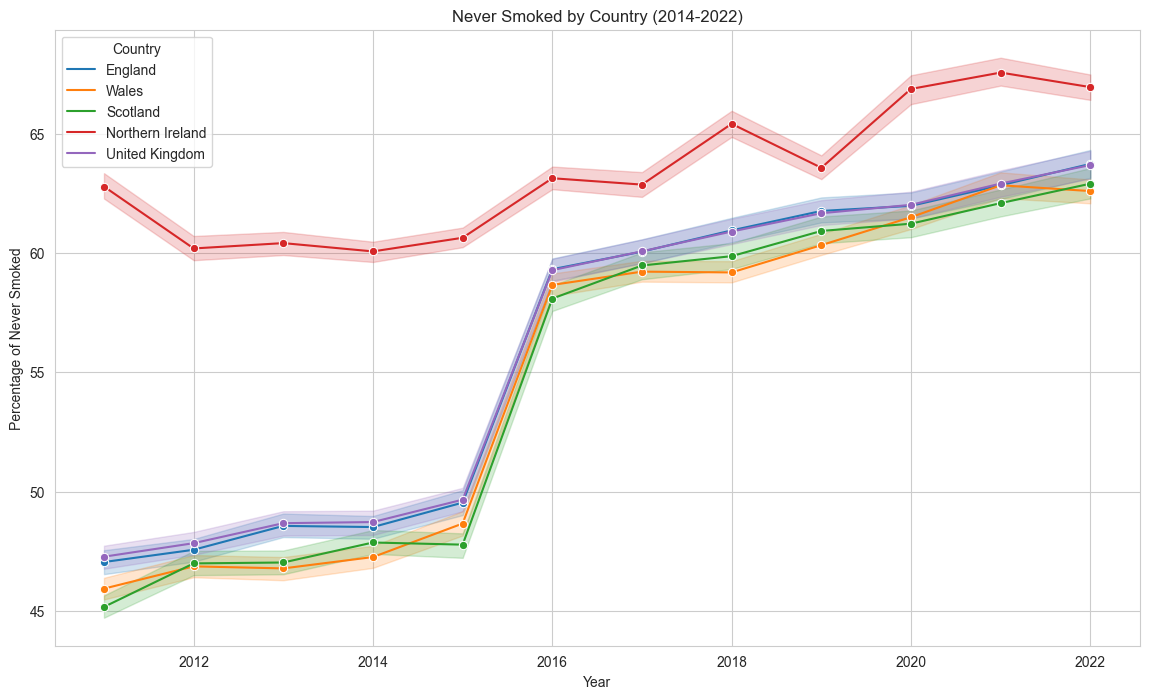

In [16]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create line plots for each smoking category by Country
smoking_categories = ['Current_smokers_%', 'Ex-smokers_%', 'Never_smoked_%']
titles = ['Current Smokers', 'Ex-Smokers', 'Never Smoked']

for category, title in zip(smoking_categories, titles):
    plt.figure(figsize=(14, 8))
    sns.lineplot(x='Year', y=category, hue='Country', data=data_long, marker='o')
    plt.title(f'{title} by Country (2014-2022)')
    plt.ylabel(f'Percentage of {title}')
    plt.xlabel('Year')
    plt.legend(title='Country')
    plt.show()